In [12]:
#Q4: To determine the range of penalty kicked, awarded and converted (scored) of the winners Vs non-winner

In [46]:
import pandas as pd
import numpy as np

In [47]:
tournament_data= pd.read_csv('tournaments.csv')
penalty_data=pd.read_csv('penalty_kicks.csv')

In [48]:

#tournament_data.loc[ tournament_data['winner']== "West Germany", 'winner' ] = 'Germany'
tournament_data

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,winner,host_won,count_teams,group_stage,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final
0,1,WC-1930,1930 FIFA World Cup,1930,1930-07-13,1930-07-30,Uruguay,Uruguay,1,13,1,0,0,0,0,1,0,1
1,2,WC-1934,1934 FIFA World Cup,1934,1934-05-27,1934-06-10,Italy,Italy,1,16,0,0,0,1,1,1,1,1
2,3,WC-1938,1938 FIFA World Cup,1938,1938-06-04,1938-06-19,France,Italy,0,15,0,0,0,1,1,1,1,1
3,4,WC-1950,1950 FIFA World Cup,1950,1950-06-24,1950-07-16,Brazil,Uruguay,0,13,1,0,1,0,0,0,0,0
4,5,WC-1954,1954 FIFA World Cup,1954,1954-06-16,1954-07-04,Switzerland,West Germany,0,16,1,0,0,0,1,1,1,1
5,6,WC-1958,1958 FIFA World Cup,1958,1958-06-08,1958-06-29,Sweden,Brazil,0,16,1,0,0,0,1,1,1,1
6,7,WC-1962,1962 FIFA World Cup,1962,1962-05-30,1962-07-17,Chile,Brazil,0,16,1,0,0,0,1,1,1,1
7,8,WC-1966,1966 FIFA World Cup,1966,1966-07-11,1966-07-30,England,England,1,16,1,0,0,0,1,1,1,1
8,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,1,0,0,0,1,1,1,1
9,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,1,1,0,0,0,0,1,1


In [49]:
tournament_data=tournament_data[['tournament_id', 'winner']]
tournament_data=tournament_data.rename(columns={'winner': 'team_name'})
tournament_data

,tournament_id,team_name
0,WC-1930,Uruguay
1,WC-1934,Italy
2,WC-1938,Italy
3,WC-1950,Uruguay
4,WC-1954,West Germany
5,WC-1958,Brazil
6,WC-1962,Brazil
7,WC-1966,England
8,WC-1970,Brazil
9,WC-1974,West Germany


In [50]:
penalty_data=penalty_data[['penalty_kick_id', 'tournament_id', 'team_name', 'converted', 'match_id']]
penalty_data

,penalty_kick_id,tournament_id,team_name,converted,match_id
0,PK-001,WC-1982,West Germany,1,M-1982-50
1,PK-002,WC-1982,West Germany,1,M-1982-50
2,PK-003,WC-1982,West Germany,0,M-1982-50
3,PK-004,WC-1982,West Germany,1,M-1982-50
4,PK-005,WC-1982,West Germany,1,M-1982-50
...,...,...,...,...,...
274,PK-275,WC-2018,Croatia,1,M-2018-60
275,PK-276,WC-2018,Croatia,0,M-2018-60
276,PK-277,WC-2018,Croatia,1,M-2018-60
277,PK-278,WC-2018,Croatia,1,M-2018-60


In [51]:
penalty_data=penalty_data.groupby(['tournament_id','team_name', ]).agg({'penalty_kick_id': 'count', 'converted' : 'sum'}).reset_index()
penalty_data=penalty_data.rename(columns={'penalty_kick_id': 'total_penalty_kicks'})
penalty_data['conversion_percentage(%)']=penalty_data['converted']/penalty_data['total_penalty_kicks']*100
penalty_data.head()

,tournament_id,team_name,total_penalty_kicks,converted,conversion_percentage(%)
0,WC-1982,France,6,4,66.666667
1,WC-1982,West Germany,6,5,83.333333
2,WC-1986,Belgium,5,5,100.000000
3,WC-1986,Brazil,5,3,60.000000
4,WC-1986,France,5,4,80.000000


In [52]:
winning_team_penalty_info=pd.merge(penalty_data, tournament_data, on= ['tournament_id', 'team_name'])
winning_team_penalty_info=winning_team_penalty_info[['tournament_id', 'team_name', 'total_penalty_kicks', 'converted', 'conversion_percentage(%)']].drop_duplicates()
winning_team_penalty_info=winning_team_penalty_info.rename(columns={'team_name': 'winner'})
winning_team_penalty_info


,tournament_id,winner,total_penalty_kicks,converted,conversion_percentage(%)
0,WC-1990,West Germany,4,4,100.0
1,WC-1994,Brazil,4,3,75.0
2,WC-1998,France,5,4,80.0
3,WC-2006,Italy,5,5,100.0


In [53]:
non_winning_team_penalty_info = penalty_data.merge( tournament_data[ [ 'tournament_id', 'team_name' ] ], \
                      how='outer', left_on=['tournament_id', 'team_name'], \
                      right_on=['tournament_id', 'team_name'], indicator=True )

non_winning_team_penalty_info = non_winning_team_penalty_info.loc[ non_winning_team_penalty_info['_merge'] == 'left_only' ]
del non_winning_team_penalty_info['_merge']
non_winning_team_penalty_info.head()


,tournament_id,team_name,total_penalty_kicks,converted,conversion_percentage(%)
0,WC-1982,France,6.0,4.0,66.666667
1,WC-1982,West Germany,6.0,5.0,83.333333
2,WC-1986,Belgium,5.0,5.0,100.000000
3,WC-1986,Brazil,5.0,3.0,60.000000
4,WC-1986,France,5.0,4.0,80.000000


In [54]:
winning_team_penalty_info.describe()

,total_penalty_kicks,converted,conversion_percentage(%)
count,4.00000,4.000000,4.000000
mean,4.50000,4.000000,88.750000
std,0.57735,0.816497,13.149778
min,4.00000,3.000000,75.000000
25%,4.00000,3.750000,78.750000
50%,4.50000,4.000000,90.000000
75%,5.00000,4.250000,100.000000
max,5.00000,5.000000,100.000000


In [55]:
non_winning_team_penalty_info.describe()

,total_penalty_kicks,converted,conversion_percentage(%)
count,50.000000,50.000000,50.000000
mean,5.220000,3.600000,67.511111
std,1.632452,1.678191,22.652924
min,3.000000,0.000000,0.000000
25%,4.000000,3.000000,60.000000
50%,5.000000,3.000000,72.500000
75%,5.000000,4.000000,80.000000
max,10.000000,8.000000,100.000000


In [56]:
#End of Data Transformation Code
#Begin Visualization Code

In [57]:
import matplotlib.pyplot as plt

In [58]:
#noted for reference 
#winning_team_penalty_info[['tournament_id', 'winner', 'total_penalty_kicks', 'converted', 'conversion_percentage(%)']]
#non_winning_team_penalty_info[['tournament_id', 'team_name', 'total_penalty_kicks', 'converted', 'conversion_percentage(%)']]


In [77]:
#we need a list of the tournament_id's for the x axis and then the count of card will be the y Axis
tournaments = non_winning_team_penalty_info["tournament_id"].values
winner_pk_count= winning_team_penalty_info["total_penalty_kicks"].values
winner_conversion_count= winning_team_penalty_info["converted"].values
w_conv_rate = winning_team_penalty_info["conversion_percentage(%)"].values
wtournaments = winning_team_penalty_info["tournament_id"].values

nonwinner_pk_count= non_winning_team_penalty_info["total_penalty_kicks"].values
nonwinner_conversion_count= non_winning_team_penalty_info["converted"].values
nw_conv_rate = non_winning_team_penalty_info["conversion_percentage(%)"].values
tournaments

array(['WC-1982', 'WC-1982', 'WC-1986', 'WC-1986', 'WC-1986', 'WC-1986',
       'WC-1986', 'WC-1986', 'WC-1990', 'WC-1990', 'WC-1990', 'WC-1990',
       'WC-1990', 'WC-1990', 'WC-1994', 'WC-1994', 'WC-1994', 'WC-1994',
       'WC-1994', 'WC-1998', 'WC-1998', 'WC-1998', 'WC-1998', 'WC-1998',
       'WC-2002', 'WC-2002', 'WC-2002', 'WC-2006', 'WC-2006', 'WC-2006',
       'WC-2006', 'WC-2006', 'WC-2006', 'WC-2006', 'WC-2010', 'WC-2010',
       'WC-2010', 'WC-2010', 'WC-2014', 'WC-2014', 'WC-2014', 'WC-2014',
       'WC-2014', 'WC-2014', 'WC-2018', 'WC-2018', 'WC-2018', 'WC-2018',
       'WC-2018', 'WC-2018'], dtype=object)

In [70]:
#need to group non_winner booking info by tournament so that there are the same number of rows as winning booking info table (0-12)
non_winning_tourn_penalty_info = non_winning_team_penalty_info.groupby(['tournament_id']).agg( {'total_penalty_kicks': 'mean', 'converted': 'mean', 'conversion_percentage(%)':'mean'} ).reset_index()
non_winning_tourn_penalty_info

nonwinner_pk_count= non_winning_tourn_penalty_info["total_penalty_kicks"].values
nonwinner_conversion_count= non_winning_tourn_penalty_info["converted"].values
nonwinner_pk_count

array([6.        , 4.5       , 5.66666667, 5.        , 4.6       ,
       6.33333333, 4.        , 4.5       , 6.        , 6.5       ])

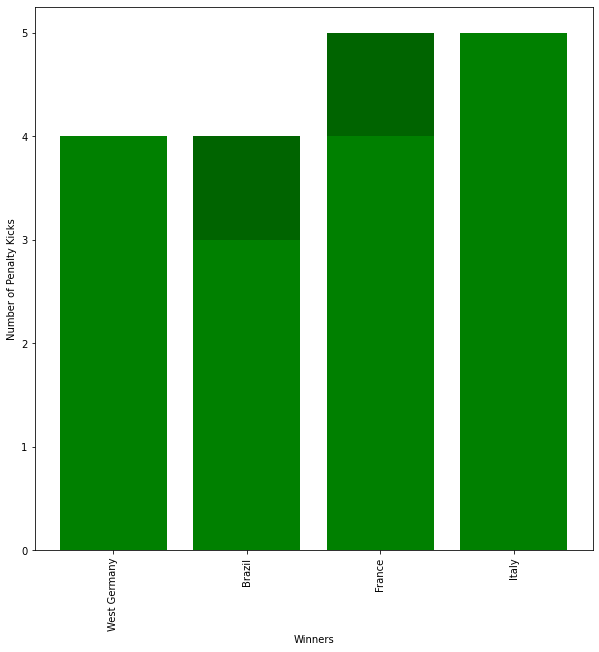

In [74]:
#test
winners = winning_team_penalty_info["winner"].values

#graph build and display
plt.figure(figsize=(10,10))
plt.bar(winners , winner_pk_count, color="darkgreen", label = "Winner")
plt.bar(winners , winner_conversion_count, color="green", label = "Winner")
plt.xlabel('Winners')
plt.ylabel('Number of Penalty Kicks')
plt.xticks(rotation=90)
plt.show()


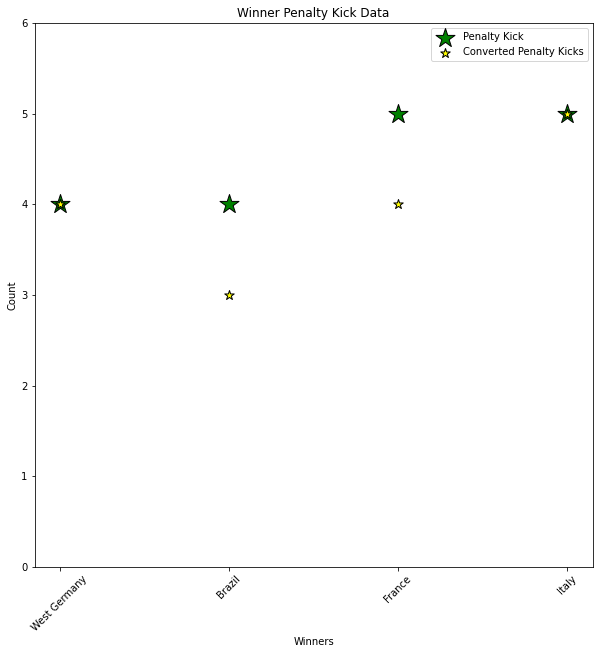

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(winners, winner_pk_count , marker= '*',s =400, facecolors="green", edgecolors="black", label = "Penalty Kick")
plt.scatter(winners, winner_conversion_count ,marker= '*',s =100, facecolors="yellow", edgecolors="black", label = "Converted Penalty Kicks")
plt.ylim(0,6)
plt.xlabel("Winners")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Winner Penalty Kick Data")
plt.legend(loc='best')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

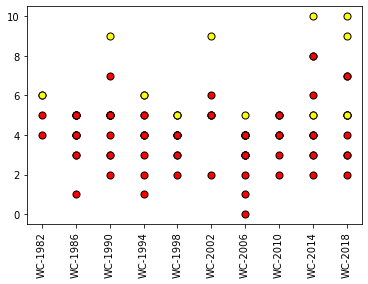

In [88]:
plt.scatter(tournaments, nonwinner_pk_count ,s =50, facecolors="yellow", edgecolors="black", label = "NonWinner Average Yellow Card")
plt.scatter(tournaments, nonwinner_conversion_count ,s =50, facecolors="red", edgecolors="black", label = "NonWinner Average Red Card")
plt.xticks(rotation=90)
